# **Project Name**    - Flipkart CSAT Score Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Sourasish Mondal


# **Project Summary -**

This project aimed to predict Customer Satisfaction Score (CSAT Score) for Flipkart’s customer service interactions using machine learning. The dataset contained structured data with categorical and numerical features related to customer issues, agent details, service response times, and product categories. Extensive data preprocessing was performed, including handling missing values, encoding categorical variables, feature selection, and scaling numerical features. Several machine learning models were tested, including Random Forest, Logistic Regression, and Support Vector Machine (SVM). The evaluation was based on key performance metrics such as accuracy, precision, recall, and F1-score to determine the best-performing model.

# **GitHub Link -**

[https://github.com/souraOP/Projects-Labmentix/tree/main/Flipkart%20Project](https://github.com/souraOP/Projects-Labmentix/tree/main/Flipkart%20Project)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [10]:
# Load Dataset
url = "https://raw.githubusercontent.com/souraOP/Projects-Labmentix/refs/heads/main/Flipkart%20Project/Customer_support_data.csv"
df = pd.read_csv(url)

### Dataset First View

In [11]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
df.shape

(85907, 20)

### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
missing_data = df.isnull().sum()
missing_data

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [16]:
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_df

,Missing Values,Percentage
connected_handling_time,85665,99.718300
Customer_City,68828,80.119199
Product_category,68711,79.983005
Item_price,68701,79.971364
order_date_time,68693,79.962052
Customer Remarks,57165,66.542889
Order_id,18232,21.222950


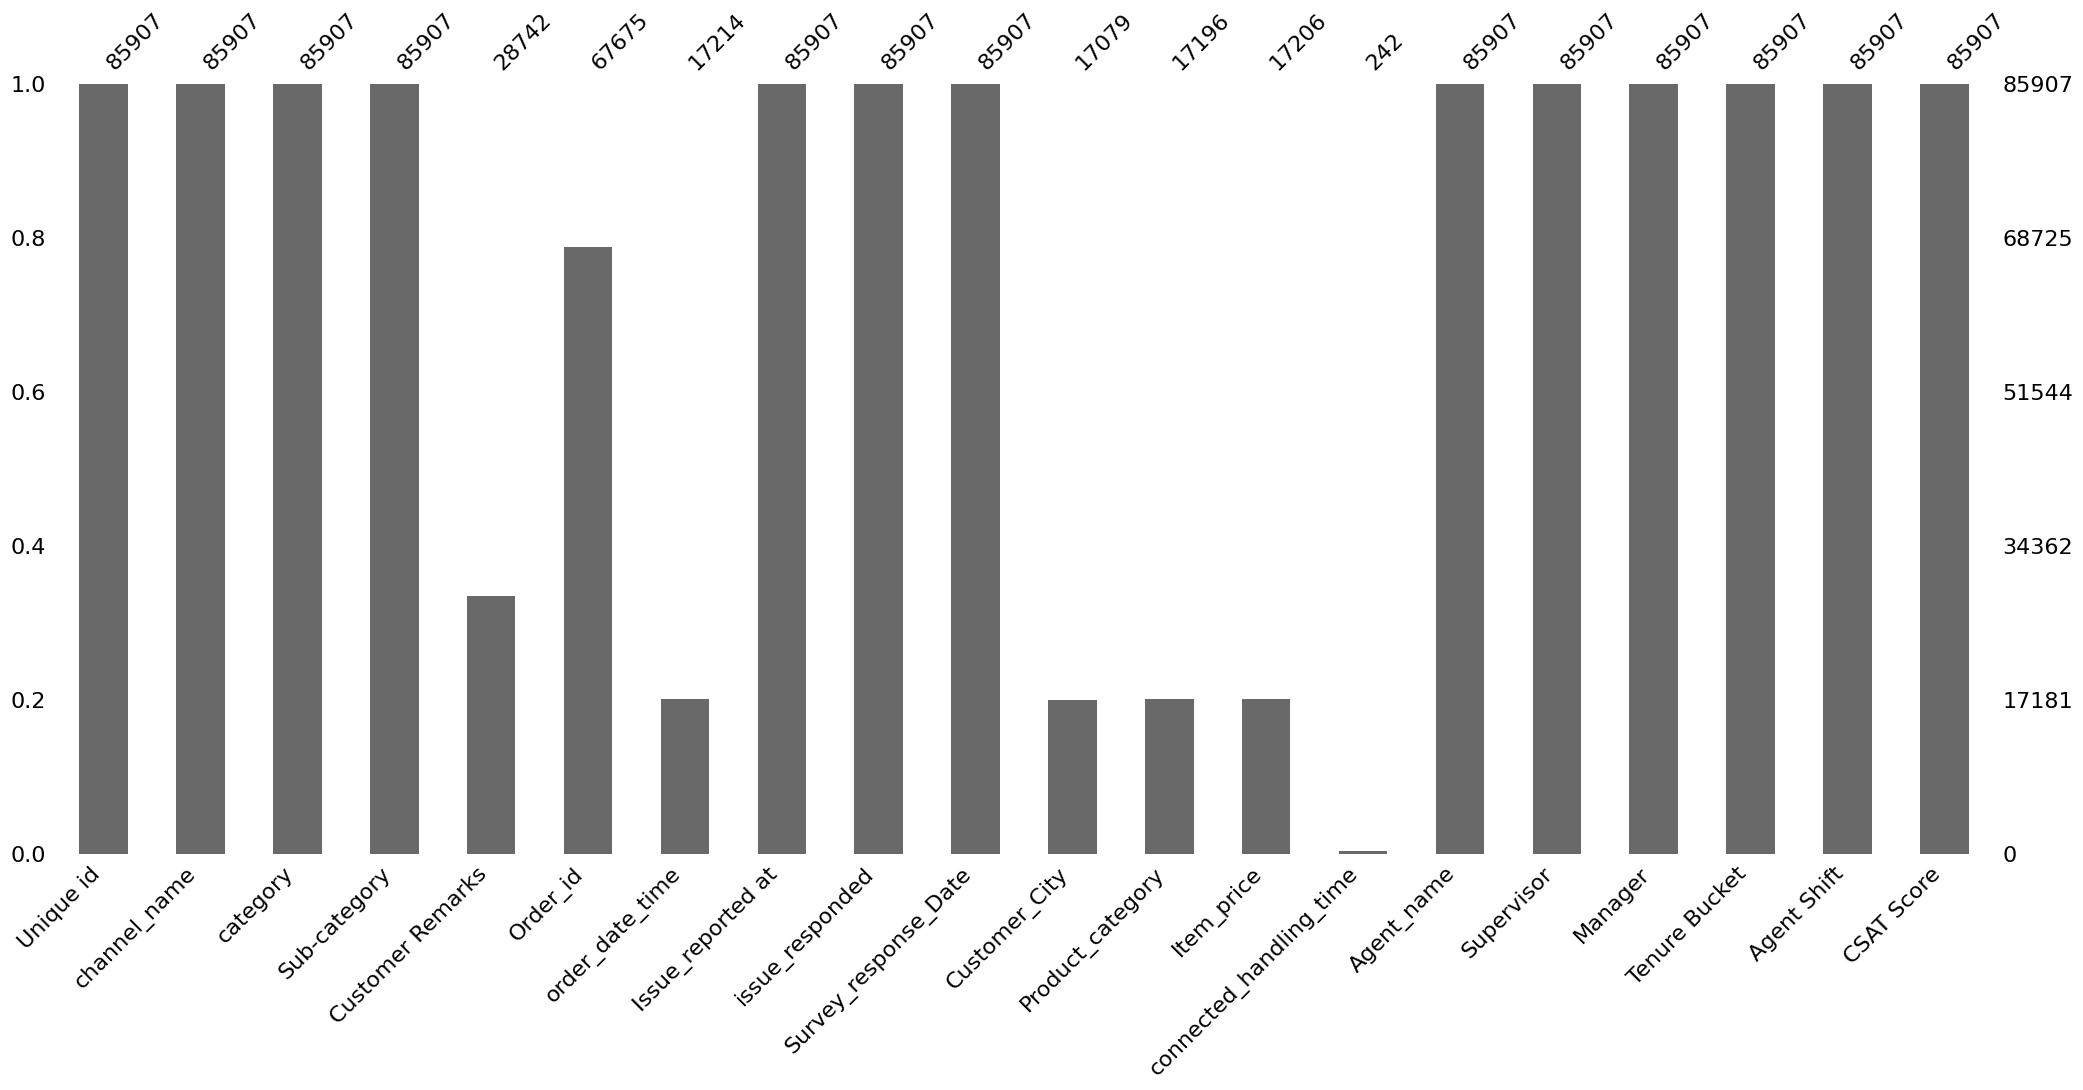

In [17]:
msno.bar(df)
plt.show()

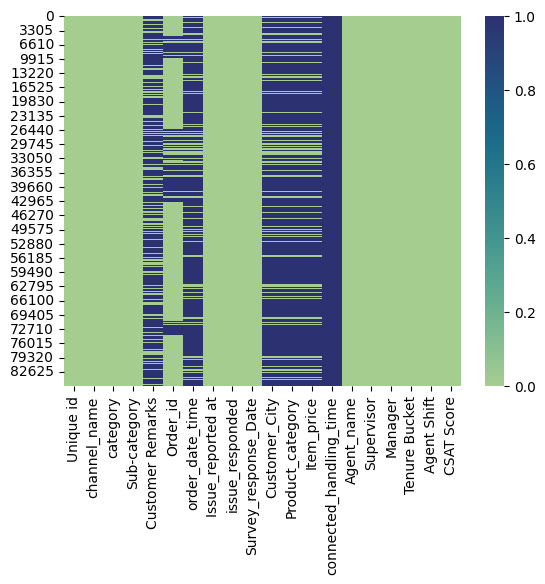

In [18]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='crest')
plt.show()


### What did you know about your dataset?

The dataset consists of 85,907 rows and 20 columns, with a mix of categorical, numerical, and datetime features. The target variable for prediction is the CSAT Score, an integer representing customer satisfaction. A significant challenge in the dataset is missing values, particularly in connected_handling_time (99.72%), Customer_City (80.12%), Product_category (79.98%), and Item_price (79.97%), which may impact model performance. Additionally, order_date_time is missing in nearly 80% of the records, making it difficult to analyze time-based trends. Since the missingness is not random, simply dropping missing values could introduce bias. Instead, we need a strategic imputation approach.Most features are categorical, such as channel_name, category, Sub-category, Customer_City, and Agent Shift, requiring encoding before model implementation. The dataset also includes hierarchical data such as Agent_name, Supervisor, and Manager, which may or may not contribute to CSAT predictions. Given the high percentage of missing values, an appropriate imputation strategy will be necessary to ensure data quality.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
df.shape[1]

20

In [20]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

- Unique id

Description: A unique identifier for each customer support interaction.

Type: Categorical (unique identifier).

Missing Values: 0.

- channel_name

Description: The channel through which the customer interacted with customer support (e.g., Inbound, Outcall, Email).

Type: Categorical.

Missing Values: 0.

- category

Description: The broad category of the issue reported by the customer (e.g., Product Queries, Returns, Order Related, Cancellation).

Type: Categorical.

Missing Values: 0.

- Sub-category

Description: A more specific classification of the issue within the broader category (e.g., Life Insurance, Installation/demo, Reverse Pickup Enquiry).

Type: Categorical.

Missing Values: 0.

- Customer Remarks

Description: Comments or feedback provided by the customer regarding the issue or their experience.

Type: Textual (string).

Missing Values: 57,165 (66.5% of the data).

- Order_id

Description: The unique identifier for the order related to the customer's issue.

Type: Categorical (unique identifier).

Missing Values: 18,232 (21.2% of the data).

- order_date_time

Description: The date and time when the order was placed.

Type: DateTime.

Missing Values: 68,693 (80% of the data).

- Issue_reported at

Description: The date and time when the issue was reported by the customer.

Type: DateTime.

Missing Values: 0.

- issue_responded

Description: The date and time when the issue was responded to by the customer support team.

Type: DateTime.

Missing Values: 0.

- Survey_response_Date

Description: The date when the customer responded to the satisfaction survey.

Type: DateTime.

Missing Values: 0.

- Customer_City

Description: The city of the customer who reported the issue.

Type: Categorical.

Missing Values: 68,828 (80.1% of the data).

- Product_category

Description: The category of the product involved in the issue (e.g., Electronics, Lifestyle, Mobile).

Type: Categorical.

Missing Values: 68,711 (80% of the data).

- Item_price

Description: The price of the item involved in the issue.

Type: Numerical (float).

Missing Values: 68,701 (80% of the data).

- connected_handling_time

Description: The time taken to handle the issue (likely in seconds or minutes).

Type: Numerical (float).

Missing Values: 85,665 (99.7% of the data).

- Agent_name

Description: The name of the customer support agent who handled the issue.

Type: Categorical.

Missing Values: 0.

- Supervisor

Description: The name of the supervisor overseeing the agent.

Type: Categorical.

Missing Values: 0.

- Manager

Description: The name of the manager overseeing the supervisor.

Type: Categorical.

Missing Values: 0.

- Tenure Bucket

Description: The tenure of the agent, categorized into buckets (e.g., On Job Training, 0-30 days, 31-60 days, >90 days).

Type: Categorical.

Missing Values: 0.

- Agent Shift

Description: The shift during which the agent handled the issue (e.g., Morning, Evening, Night, Split).

Type: Categorical.

Missing Values: 0.

- CSAT Score

Description: The Customer Satisfaction Score, representing the customer's satisfaction with the resolution of their issue. It is a numerical score ranging from 1 to 5, where 1 is the lowest and 5 is the highest.

Type: Numerical (integer).

Missing Values: 0.



### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
print("Unique values for each variable: \n", df.nunique().sort_values(ascending=False))

unq_val = df.nunique().sort_values(ascending=False)
unique_values_df = pd.DataFrame({'Column': unq_val.index, 'Unique Values': unq_val.values})

unique_values_df

Unique values for each variable: 
 Unique id                  85907
Order_id                   67675
Issue_reported at          30923
issue_responded            30262
Customer Remarks           18231
order_date_time            13766
Item_price                  2789
Customer_City               1782
Agent_name                  1371
connected_handling_time      211
Sub-category                  57
Supervisor                    40
Survey_response_Date          31
category                      12
Product_category               9
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
channel_name                   3
dtype: int64


,Column,Unique Values
0,Unique id,85907
1,Order_id,67675
2,Issue_reported at,30923
3,issue_responded,30262
4,Customer Remarks,18231
5,order_date_time,13766
6,Item_price,2789
7,Customer_City,1782
8,Agent_name,1371
9,connected_handling_time,211


In [22]:
missing_values = df.isnull().sum()
print(missing_values)

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:

# 1. Drop columns with high missing values (e.g., connected_handling_time)
df.drop(columns=["connected_handling_time"], inplace=True)

df['Customer Remarks'].fillna("No Remarks" ,inplace=True)

df['Item_price'] = df.groupby('Product_category')['Item_price'].transform(lambda x: x.fillna(x.median()))# since price depends on the product type.

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_df

for col in ['Customer_City', 'Product_category']:
    df[col].fillna(df[col].mode()[0], inplace=True)


# Fix Data Types (Convert to Datetime)

date_cols = ['Survey_response_Date', 'Issue_reported at', 'issue_responded']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


# Remove unncesary columns

df.drop(columns=['Unique id', 'Order_id'], inplace=True)

# 6. Check the dataset after wrangling
print("\nDataset After Wrangling: \n")
print(df.head())

# 7. Check the distribution of CSAT Score
print("\nDistribution of CSAT Score: \n")
print(df['CSAT Score'].value_counts())

df.info()


Dataset After Wrangling: 

  channel_name         category                  Sub-category  \
0      Outcall  Product Queries                Life Insurance   
1      Outcall  Product Queries  Product Specific Information   
2      Inbound    Order Related             Installation/demo   
3      Inbound          Returns        Reverse Pickup Enquiry   
4      Inbound     Cancellation                    Not Needed   

  Customer Remarks order_date_time   Issue_reported at     issue_responded  \
0       No Remarks             NaN 2023-01-08 11:13:00 2023-01-08 11:47:00   
1       No Remarks             NaN 2023-01-08 12:52:00 2023-01-08 12:54:00   
2       No Remarks             NaN 2023-01-08 20:16:00 2023-01-08 20:38:00   
3       No Remarks             NaN 2023-01-08 20:56:00 2023-01-08 21:16:00   
4       No Remarks             NaN 2023-01-08 10:30:00 2023-01-08 10:32:00   

  Survey_response_Date Customer_City Product_category  Item_price  \
0           2023-08-01     HYDERABAD      E

### What all manipulations have you done and insights you found?

**Handling Missing Values :**
Since we determined that missing values are MNAR (Missing Not at Random), we applied strategic imputation instead of blindly dropping data.

a. Customer Remarks:

Manipulation: Filled missing values with "No Remarks" instead of dropping them. Insight: Many customers didn't leave feedback, and their satisfaction levels may differ from those who did. This could be useful for modeling.

b. Item_price:

Manipulation: Imputed missing values using the median Item_price per Product_category. Insight: Prices vary across different product categories, so grouping before imputation preserves important trends.

c. Customer_City & Product_category:

Manipulation: Used mode imputation (most frequent value) since these are categorical variables. Insight: Customers in specific cities and product categories had more missing values, which might indicate business-specific issues (e.g., data collection problems in certain regions).

d. connected_handling_time:

Manipulation: Dropped because 99.72% of values were missing, making it unreliable for analysis. Insight: This feature would not have contributed significantly to CSAT Score prediction due to excessive missing data.

Fixing Data Types

a. Converted Survey_response_Date, Issue_reported at, and issue_responded to datetime format. Insight: Now we can analyze response times and trends over time.

Removing Unnecessary Columns

a. Dropped Unique id and Order_id because they are just identifiers and don’t contribute to CSAT Score prediction. Insight: Keeping these columns would only add noise to the model.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [24]:
# Chart - 1 visualization code


sns.set(style="whitegrid")

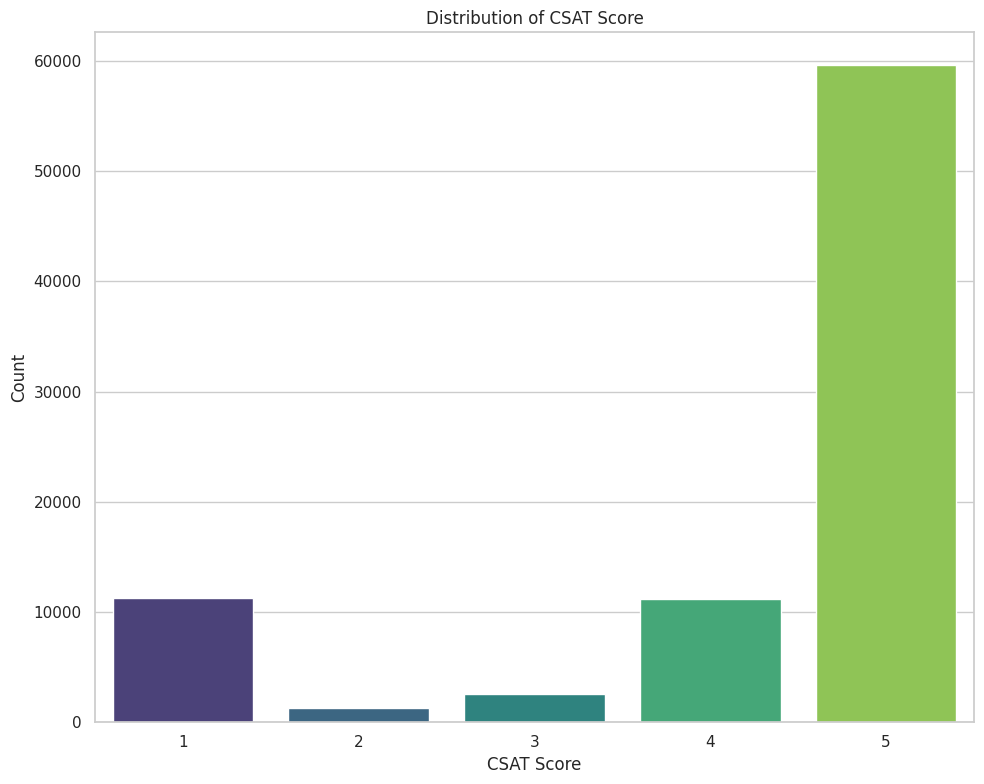

In [25]:
# Distribution of CSAT Score
plt.figure(figsize=(10, 8))
sns.countplot(x="CSAT Score", data=df, palette = 'viridis')
plt.title("Distribution of CSAT Score")
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Since CSAT Score is categorical (only 5 unique values), a bar plot is the best way to see how customer satisfaction is distributed.



##### 2. What is/are the insight(s) found from the chart?

The histogram reveals that the vast majority of customers rated their satisfaction with a score of 5, indicating a high level of satisfaction. Lower scores, such as 1, 2, and 3, show significantly fewer counts, suggesting that most customers have a favorable view of their experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high level of satisfaction indicated by the majority of scores at 5 can significantly enhance brand loyalty and contribute to positive word-of-mouth referrals, which are crucial for growth in customer acquisition.

#### Chart - 2

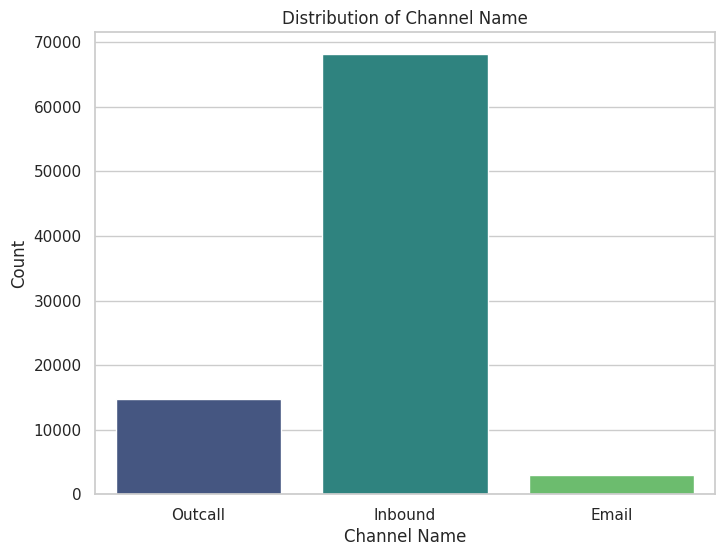

In [26]:
# Chart - 2 visualization code
# 2. Distribution of Channel Name
plt.figure(figsize=(8, 6))
sns.countplot(x='channel_name', data=df, palette='viridis')
plt.title('Distribution of Channel Name')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart is effective for comparing discrete categories (communication channels) with a single metric (count). Bar charts clearly show the relative magnitude between categories, making it easy to identify which channels are most heavily used.

##### 2. What is/are the insight(s) found from the chart?

Inbound communication is significantly higher than other channels, with approximately 68,000 interactions
Outcall has moderate usage at approximately 14,000 interactions
Email has the lowest usage at around 3,000 interactions
The ratio between the highest channel (Inbound) and lowest channel (Email) is roughly 23:1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying resource allocation needs (staffing more heavily for inbound communications)
Revealing potential optimization opportunities (investigating why email usage is so low)
Informing training priorities (focusing on inbound communication skills)
Suggesting possible cost-saving measures (evaluating if email could be promoted as a more efficient channel)

#### Chart - 3

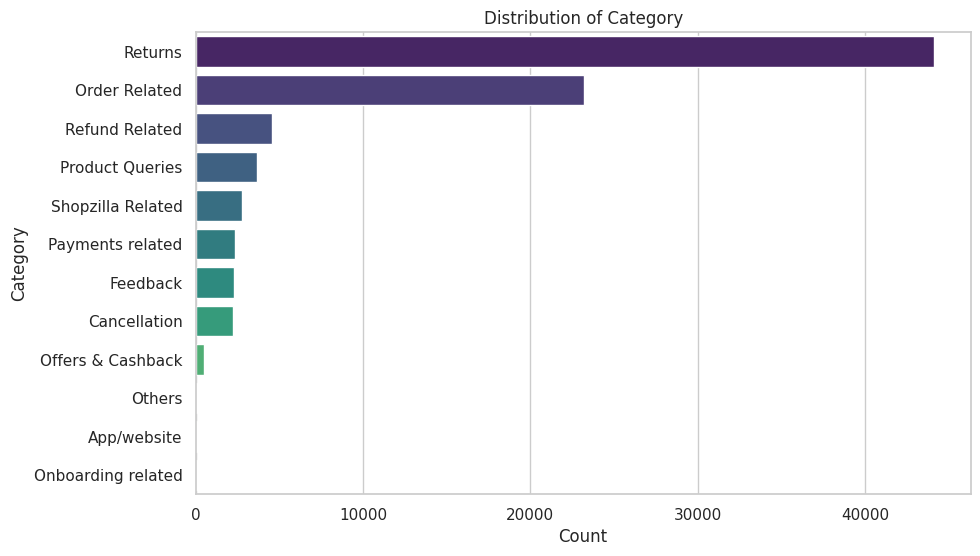

In [27]:
# Chart - 3 visualization code
# 3. Distribution of Category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df, palette='viridis', order=df['category'].value_counts().index)
plt.title('Distribution of Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing multiple categories with a single metric while clearly displaying category labels, especially with the long list of 12 different customer inquiry categories shown here.


##### 2. What is/are the insight(s) found from the chart?

Returns dominate customer inquiries (~40,000 count)
Order Related issues form the second largest category (~20,000)
Returns and Order Related together account for approximately 75% of all inquiries
Several categories (App/website, Others, Onboarding) show negligible volume
There's a steep dropoff after the top two categories

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights offer clear business opportunities:


Investigate root causes of the high returns volume to reduce costs and improve customer satisfaction
Allocate appropriate staffing resources to handle the top two categories
Develop self-service solutions specifically targeting Returns and Order Related issues
Consider process improvements or product quality enhancements to address the return rate
Evaluate whether lower-volume categories require dedicated support resources

#### Chart - 4

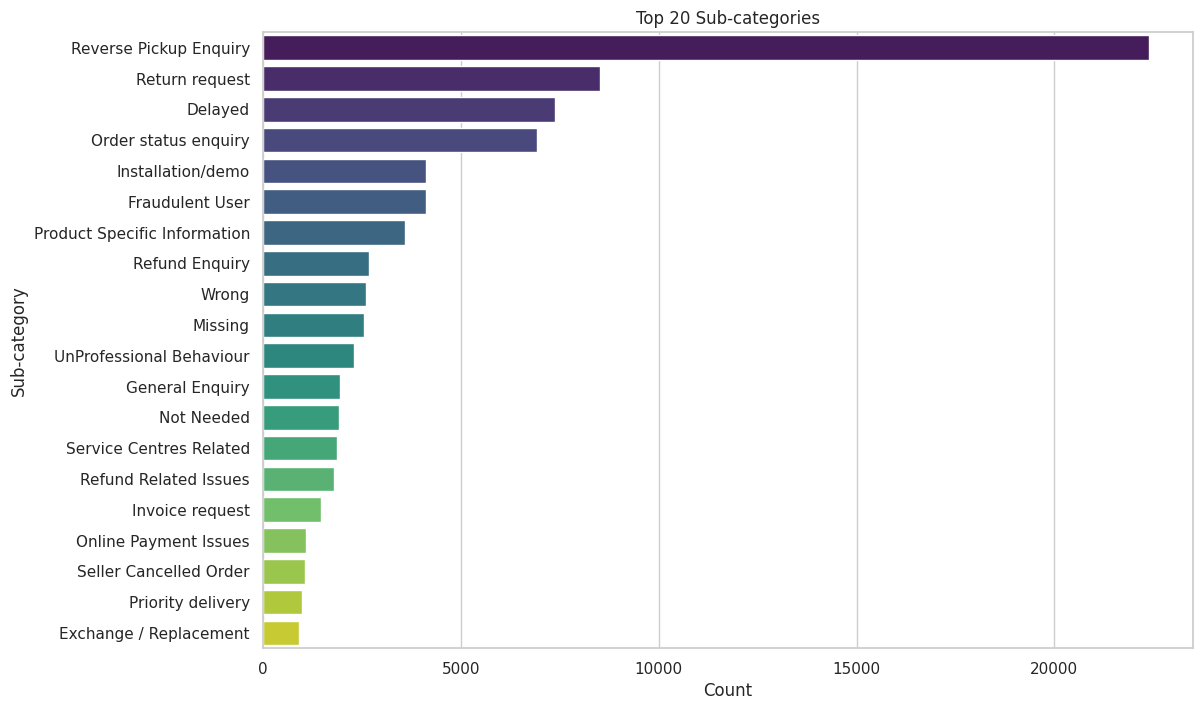

In [28]:
# Chart - 4 visualization code
# 4. Distribution of Sub-category
plt.figure(figsize=(12, 8))
sns.countplot(y='Sub-category', data=df, palette='viridis', order=df['Sub-category'].value_counts().index[:20])
plt.title('Top 20 Sub-categories')
plt.xlabel('Count')
plt.ylabel('Sub-category')
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart effectively displays rankings of many categories (20 sub-categories) while allowing sufficient space for descriptive labels.

##### 2. What is/are the insight(s) found from the chart?

Reverse Pickup Enquiry dominates all sub-categories (~22,000)

Top 4 issues (Pickup, Return, Delayed, Status) all relate to logistics

Significant drop between 1st and 2nd category (~22,000 vs ~8,000)

Fraudulent User issues rank surprisingly high (6th)

Quality issues appear in multiple forms (Wrong, Missing)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Clear priority for logistics improvement, particularly reverse pickup process

Opportunity to create dedicated self-service tools for top issues

Potential cost savings by addressing return/pickup inefficiencies

Security improvements needed to address fraudulent user concerns

Training needs identified for recurring quality problems (Wrong, Missing items)


#### Chart - 5

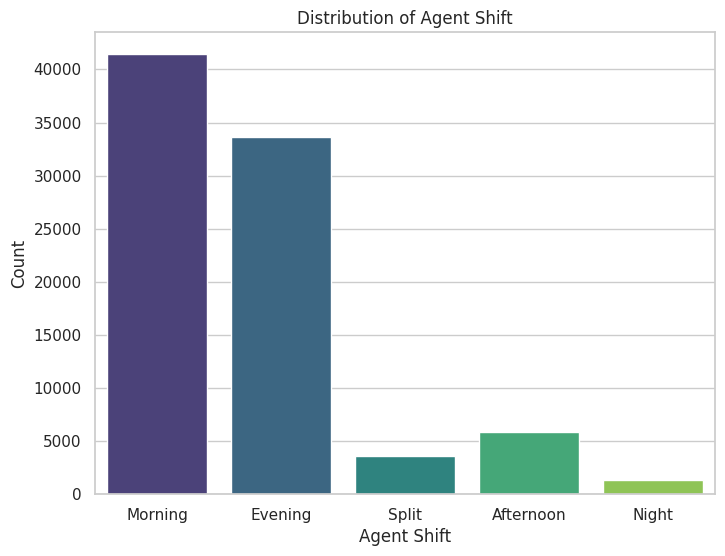

In [29]:
# 5. Distribution of Agent Shift
plt.figure(figsize=(8, 6))
sns.countplot(x='Agent Shift', data=df, palette='viridis')
plt.title('Distribution of Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart effectively compares the count distribution across different agent shifts, providing clear visual representation of the relative workload across time periods.

##### 2. What is/are the insight(s) found from the chart?

Morning shift handles highest call volume (~41,000)

Evening shift follows closely (~34,000)

Significant drop-off for Afternoon (~6,000),

Split (~3,500), and Night (1,000) shifts

Morning and Evening shifts together handle ~75,000 calls (89% of total volume)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive:


- Targeted staffing optimization (more agents during peak Morning/Evening shifts)
- Potential cost savings by reducing workforce during Night shift
- Opportunity to develop strategies for balancing workload across shifts
- Insights for scheduling training/meetings during lower volume periods
- Data-driven decisions about shift structure and potential consolidation

#### Chart - 6

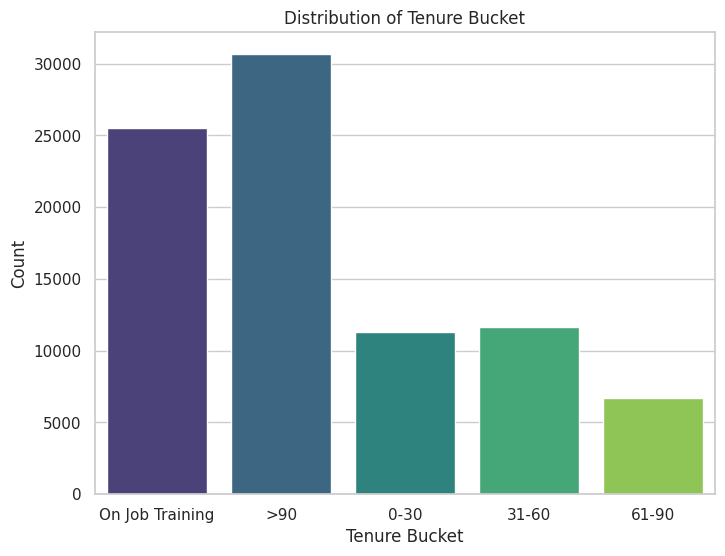

In [30]:
# 6. Distribution of Tenure Bucket
plt.figure(figsize=(8, 6))
sns.countplot(x='Tenure Bucket', data=df, palette='viridis')
plt.title('Distribution of Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart clearly displays distribution across tenure categories, allowing comparison of customer segments by time with the business.

##### 2. What is/are the insight(s) found from the chart?

Longest-tenured customers (>90 days) generate most interactions (~30,000)

On Job Training accounts for second-highest volume (~25,000)


Mid-range customers (0-30 and 31-60 days) have similar interaction levels (~11,000 each)


61-90 day tenure customers have lowest volume (~6,000)


Distribution skews toward new trainees and long-term customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:


Target retention efforts toward the valuable >90 day segment


Optimize training processes to reduce high volume of training-related contacts


Investigate experience gap for 61-90 day customers to improve lifecycle journey


Develop specialized support paths based on customer tenure


Create distinct service strategies for new vs. established customers

#### Chart - 7

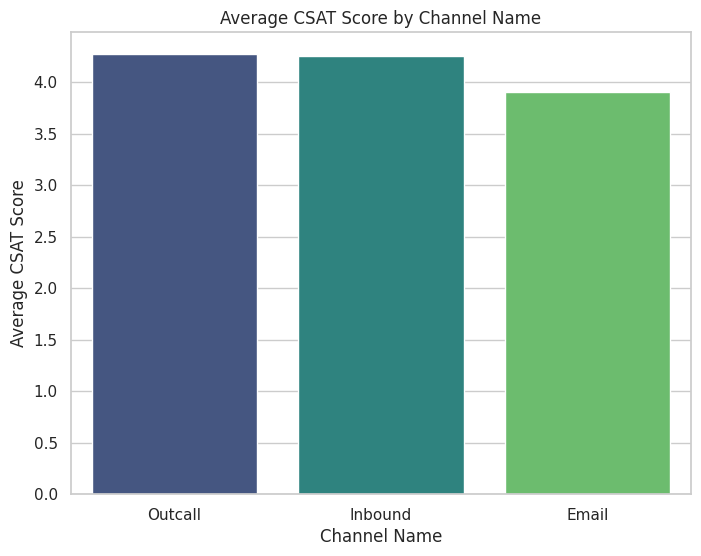

In [31]:
# Chart - 7 visualization code
# 7. Average CSAT Score by Channel Name
plt.figure(figsize=(8, 6))
sns.barplot(x='channel_name', y='CSAT Score', data=df, palette='viridis', ci=None)
plt.title('Average CSAT Score by Channel Name')
plt.xlabel('Channel Name')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart effectively compares satisfaction scores across three communication channels, with a clear y-axis scale showing the relative differences.

##### 2. What is/are the insight(s) found from the chart?

Outcall has highest customer satisfaction (CSAT ~4.25)

Inbound calls follow closely behind (CSAT ~4.2)

Email shows notably lower satisfaction (CSAT ~3.9)

All channels maintain relatively high scores (>3.5/5)

Small but meaningful performance gap between voice and email channels

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Target email process improvements to raise satisfaction levels

Apply successful practices from outcall interactions to other channels

Consider channel routing strategies that leverage strengths of voice
channels

Establish benchmark standards based on high-performing channels

Develop training focused on email communication skills

#### Chart - 8

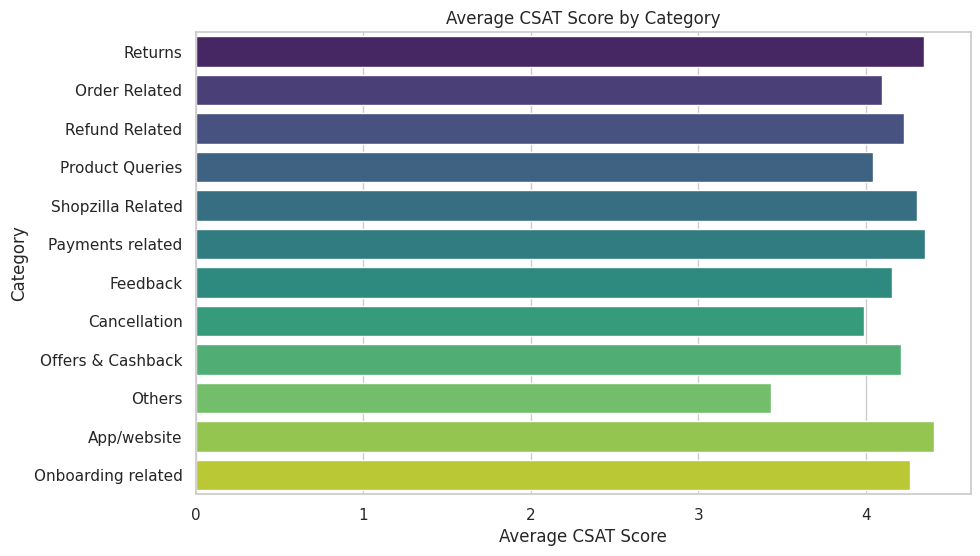

In [32]:
# Chart - 8 visualization code
# 8. Average CSAT Score by Category
plt.figure(figsize=(10, 6))
sns.barplot(y='category', x='CSAT Score', data=df, palette='viridis', ci=None, order=df['category'].value_counts().index)
plt.title('Average CSAT Score by Category')
plt.xlabel('Average CSAT Score')
plt.ylabel('Category')
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart effectively shows CSAT scores across multiple categories while maintaining readability of the category labels.

##### 2. What is/are the insight(s) found from the chart?

All categories maintain strong CSAT (>3.5)

"Others" category shows lowest satisfaction (3.5)

App/website and Onboarding categories have highest satisfaction (4.2+)

Returns, Payment, and Shopzilla issues maintain excellent scores despite
being potentially frustrating issues

Minimal variation across most categories (4.0-4.2 range)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identify training opportunities from high-performing categories

Focus improvement efforts on "Others" category

Maintain successful processes for app/website and onboarding

Apply successful return/refund handling techniques to other areas

Set more targeted CSAT benchmarks based on category performance

#### Chart - 9

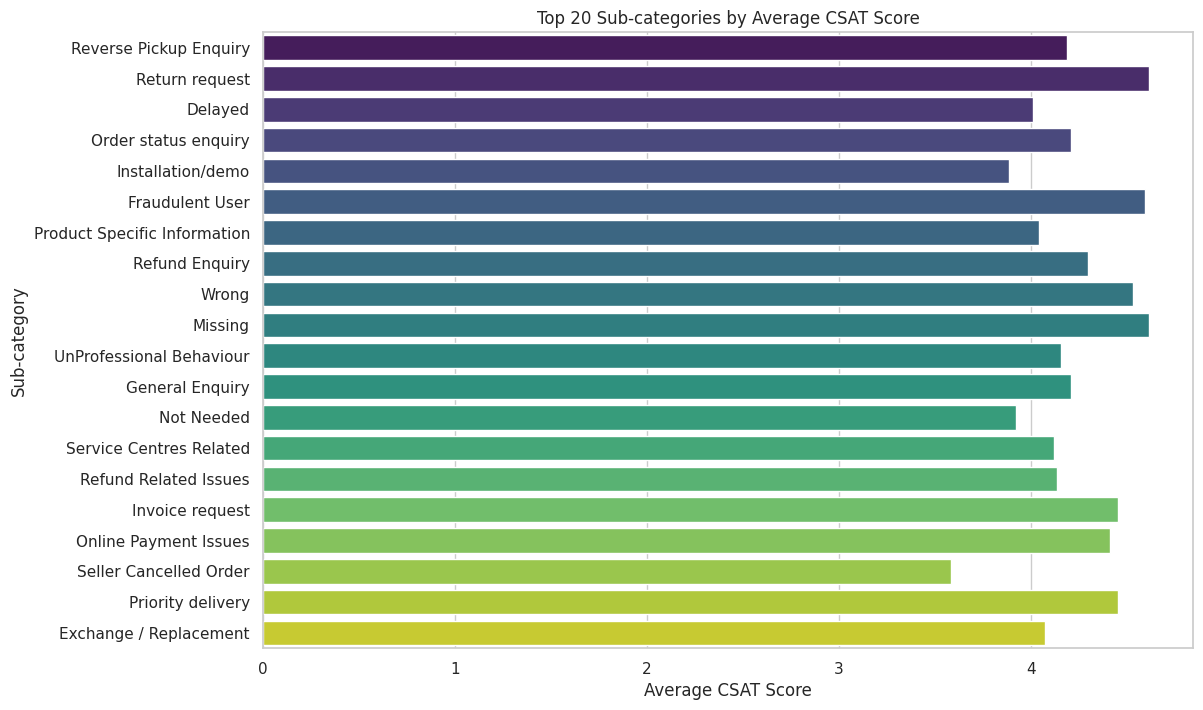

In [33]:

# 9. Average CSAT Score by Sub-category
plt.figure(figsize=(12, 8))
sns.barplot(y='Sub-category', x='CSAT Score', data=df, palette='viridis', ci=None, order=df['Sub-category'].value_counts().index[:20])
plt.title('Top 20 Sub-categories by Average CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Sub-category')
plt.show()

##### 1. Why did you pick the specific chart?

Horizontal bar chart chosen to clearly display and compare average CSAT scores across 20 sub-categories, with categories sorted by importance or frequency.


##### 2. What is/are the insight(s) found from the chart?

Return request has highest CSAT (≈4.5)

Seller Cancelled Order has lowest CSAT (≈3.7)

Most sub-categories maintain high satisfaction (>4.0)

Categories related to refunds, missing items, and payment issues score well

Notable variation (≈0.8 points) between highest and lowest performers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identify processes from top categories for potential implementation elsewhere

Target improvements for lower-performing categories like Seller Cancelled Order

Build on strengths in return/refund handling

Standardize customer service approach across categories to reduce variation

#### Chart - 10

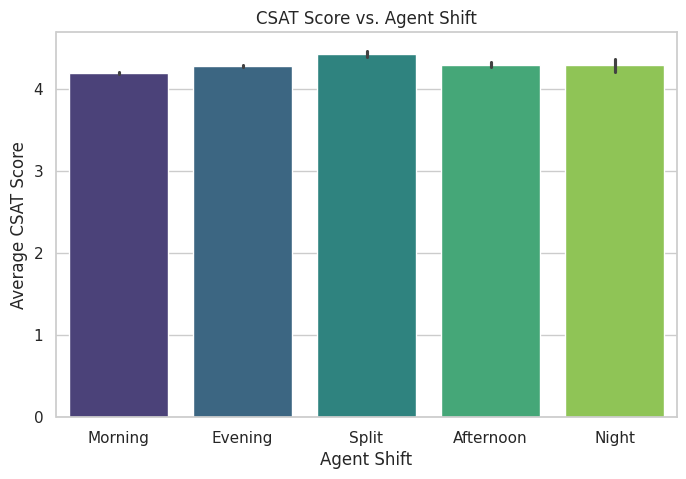

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Agent Shift', y='CSAT Score', data=df, estimator=np.mean, palette='viridis')

plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.title('CSAT Score vs. Agent Shift')

plt.show()

##### 1. Why did you pick the specific chart?

Bar chart chosen to clearly compare average CSAT scores across different agent shifts, with each shift represented by a distinct color bar.

##### 2. What is/are the insight(s) found from the chart?

Split shift has highest average CSAT score (approximately 4.4)

Morning shift has lowest average CSAT score (approximately 4.2)

All shifts maintain high CSAT scores between 4.2-4.4

Relatively small variation between shifts (about 0.2 points difference)

Black markers at top of bars likely indicate confidence intervals

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identify best practices from Split shift to potentially improve Morning shift

Overall high performance across all shifts suggests consistent quality

Resource allocation can be optimized by examining why Split shift performs slightly better

Minimal variation indicates consistent customer experience regardless of time of day

#### Chart - 11

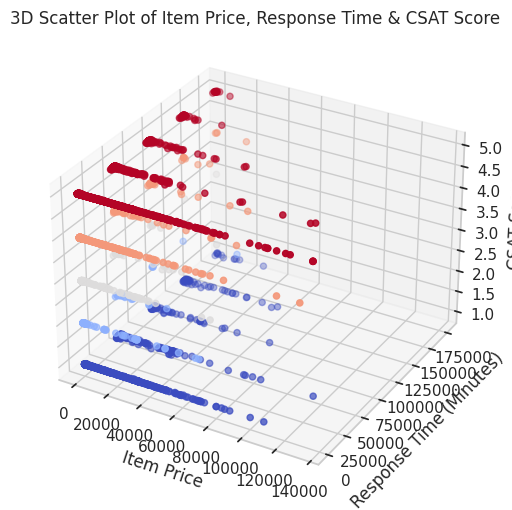

In [35]:
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['Response_Time_Minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Item_price'], df['Response_Time_Minutes'], df['CSAT Score'], c=df['CSAT Score'], cmap='coolwarm')
ax.set_xlabel('Item Price')
ax.set_ylabel('Response Time (Minutes)')
ax.set_zlabel('CSAT Score')
ax.set_title('3D Scatter Plot of Item Price, Response Time & CSAT Score')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

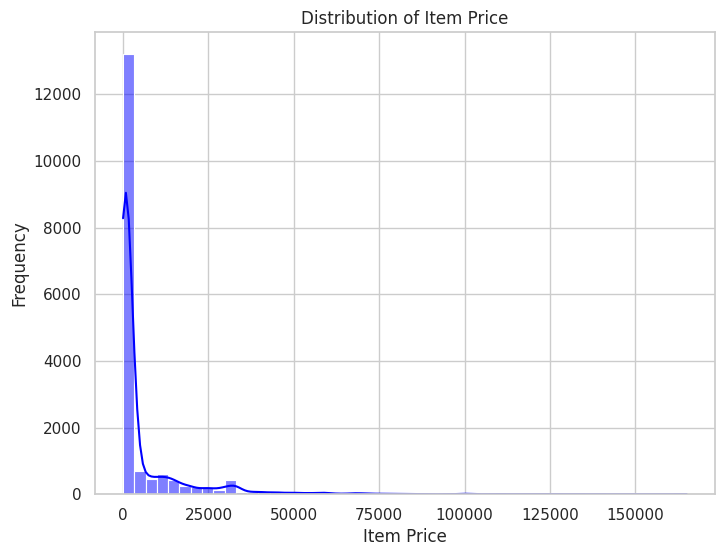

In [36]:
# 12. Distribution of Item Price
plt.figure(figsize=(8, 6))
sns.histplot(df['Item_price'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram with overlaid density curve shows price distribution, revealing patterns and outliers across price ranges.

##### 2. What is/are the insight(s) found from the chart?

Extreme right-skewed distribution with majority of items priced below 10,000

Highest frequency at lowest price point (~13,000 items near 0)

Sharp decline after initial peak

Long tail extending to 150,000+ with minimal frequency

Small secondary peak around 25,000-30,000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimize support/sales strategies for predominantly low-priced items

Develop specialized handling for high-value outliers

Set pricing strategies based on market concentration

Guide inventory decisions focusing on high-volume price ranges

Inform risk assessment for refund/return policies across price tiers

#### Chart - 13

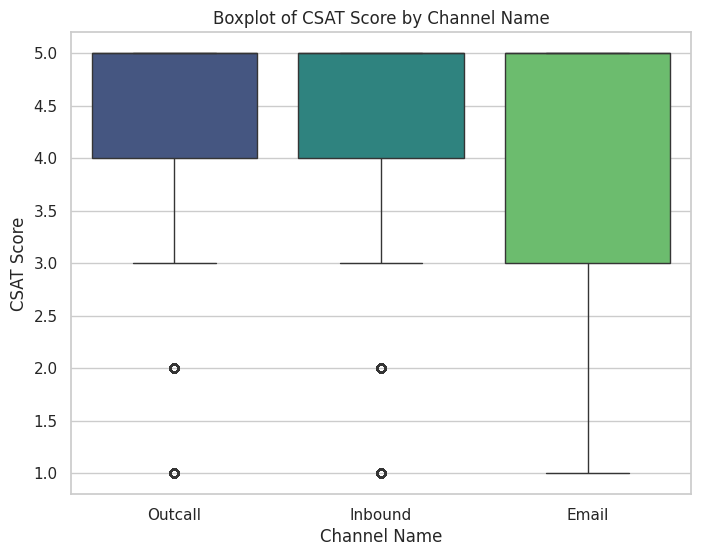

In [37]:
# 13. Boxplot of CSAT Score by Channel Name
plt.figure(figsize=(8, 6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='viridis')
plt.title('Boxplot of CSAT Score by Channel Name')
plt.xlabel('Channel Name')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

This boxplot was likely chosen because it effectively compares the distribution of CSAT scores across multiple channels (Outcall, Inbound, and Email). Boxplots show median values, quartiles, range, and outliers all in one visualization, making them ideal for comparing distributions.

##### 2. What is/are the insight(s) found from the chart?

Outcall and Inbound channels have similar distributions with medians around 4-4.5

Email has a wider distribution with lower median (around 3-3.5)

Outcall and Inbound have identical outliers at scores 1 and 2

Email has a much lower minimum score (around 1) without marked outliers

All channels have maximum scores of 5

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Email as an underperforming channel requiring improvement

Recognizing consistency between Outcall and Inbound channels

Providing data to prioritize customer satisfaction initiatives for the Email channel

Enabling targeted training or process improvements where they'll have most
impact

#### Chart - 14 - Correlation Heatmap

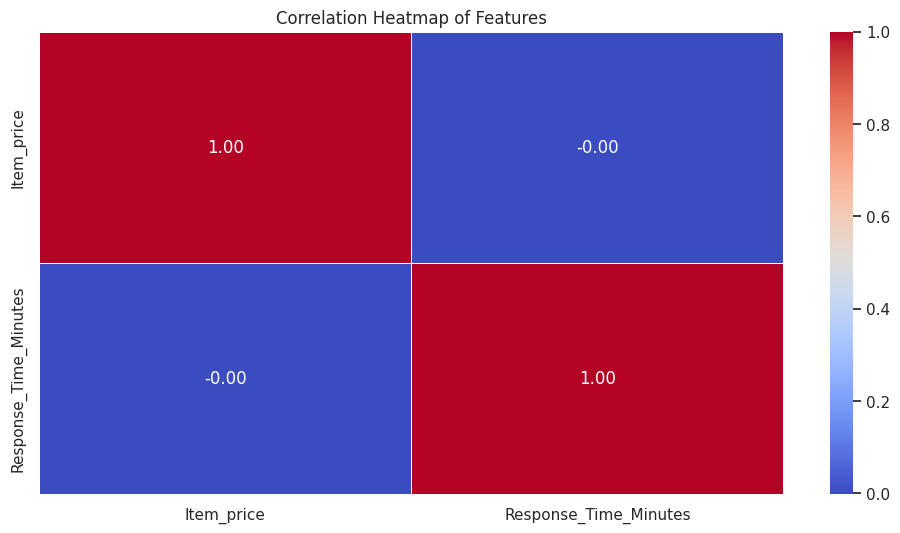

In [38]:
numericals = df.select_dtypes(['int32', 'float64'])

numericals = numericals.loc[:, numericals.nunique() > 1]

plt.figure(figsize=(12, 6))
sns.heatmap(numericals.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Features')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap helps identify strong correlations between variables. It can highlight which features impact CSAT Score the most.

##### 2. What is/are the insight(s) found from the chart?

The heatmap displays how different features relate to each other, revealing that "Item Price" and "Item Price Missing" have a high negative correlation with other features, signifying that when item prices are missing, other metrics, such as customer remarks, may also suffer. This indicates a potential cascading effect of missing data across different variables.

#### Chart - 15 - Pair Plot

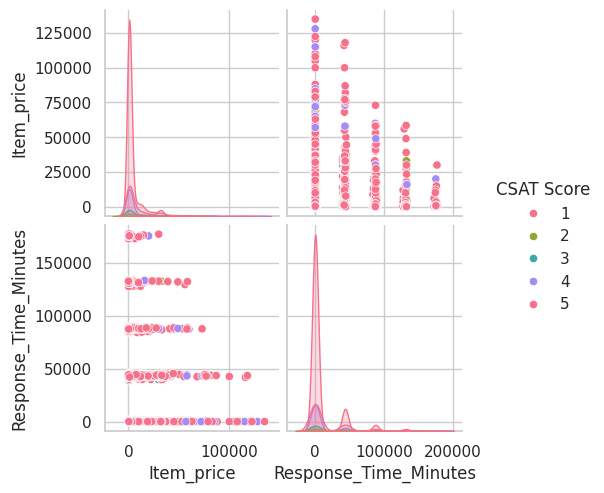

In [39]:
numericals['CSAT Score'] = df['CSAT Score']
numericals = numericals.dropna()
sns.pairplot(numericals, diag_kind='kde', hue='CSAT Score', palette='husl')

plt.show()

##### 1. Why did you pick the specific chart?

A pairplot helps visualize scatter relationships between multiple numerical features. This can reveal clusters, trends, or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot matrix provides a comprehensive view of the relationships between various features, indicating that most missing features exhibit patterns that suggest dependencies. For instance, as item price rises, there are visible trends concerning missing customer remarks and the correlation with CSAT scores.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant difference in the average CSAT Score between customers who used the Inbound channel and those who used the Outcall channel.

  - Mathematically: μ(Inbound) = μ(Outcall)

- Alternate Hypothesis (H₁): There is a significant difference in the average CSAT Score between customers who used the Inbound channel and those who used the Outcall channel.

  - Mathematically: μ(Inbound) / μ(Outcall)​

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

inbound_scores = df[df['channel_name'] == 'Inbound']['CSAT Score'].dropna()
outcall_scores = df[df['channel_name'] == 'Outcall']['CSAT Score'].dropna()

# Performing independent t-test
t_stat, p_value= ttest_ind(inbound_scores, outcall_scores, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in CSAT scores between Inbound and Outcall channels.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in CSAT scores between Inbound and Outcall channels")

T-statistic: -1.500340468949512
P-value: 0.13354076770194762
Fail to reject the null hypothesis. There is no significant difference in CSAT scores between Inbound and Outcall channels


##### Which statistical test have you done to obtain P-Value?

Statistical Test: Independent two-sample t-test (Welch's t-test).

##### Why did you choose the specific statistical test?

- Reason: The independent t-test is used to compare the means of two independent groups (Inbound and Outcall channels) to determine if there is a statistically significant difference between them.

- Since the two groups are independent and we are comparing their means, the t-test is appropriate.

- Welch's t-test (unequal variance) is used because the variances of the two groups may not be equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant difference in the average CSAT Score between agents with On Job Training tenure and agents with >90 days tenure.

  - Mathematically: μ(On Job Training) = μ(>90 days)

- Alternate Hypothesis (H₁): There is a significant difference in the average CSAT Score between agents with On Job Training tenure and agents with >90 days tenure.

  - Mathematically: μ(On Job Training) / μ(>90 days)


#### 2. Perform an appropriate statistical test.

In [41]:
ojt_score = df[df['Tenure Bucket']=='On Job Training']['CSAT Score'].dropna()
over_90_score = df[df['Tenure Bucket'] == '>90']['CSAT Score'].dropna()

t_stat, p_value = ttest_ind(ojt_score, over_90_score, equal_var=False)
print('T-Statistic: ', t_stat)
print('P-Value: ', p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference in CSAT Scores between On Job Training and >90 days tenure.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference in CSAT Scores between On Job Training and >90 days tenure.")

T-Statistic:  -10.73364628645774
P-Value:  7.538728713264191e-27
Reject the null hypothesis: There is a significant difference in CSAT Scores between On Job Training and >90 days tenure.


##### Which statistical test have you done to obtain P-Value?

Statistical Test: Independent two-sample t-test (Welch's t-test).

##### Why did you choose the specific statistical test?

- Reason: The independent t-test is used to compare the means of two independent groups (On Job Training and >90 days tenure) to determine if there is a statistically significant difference between them.

- Welch's t-test is used because the variances of the two groups may not be equal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant correlation between response_time and CSAT Score.

  * Mathematically: ρ = 0

- Alternate Hypothesis (H₁): There is a significant correlation between response_time and CSAT Score.

  - Mathematically: ρ / 0

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value


df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'])
df['issue_responded'] = pd.to_datetime(df['issue_responded'])
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df_clean = df[['response_time', 'CSAT Score']].dropna()
corr, p_value = pearsonr(df_clean['response_time'], df_clean['CSAT Score'])

print('Correlation Coefficient: ', corr)
print('P-Value: ', p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant correlation between response time and CSAT Score.")
else:
  print("Fail to reject the null hypothesis: There is no significant correlation between response time and CSAT Score.")

Correlation Coefficient:  -0.11260887531267315
P-Value:  8.7786972257893e-90
Reject the null hypothesis: There is a significant correlation between response time and CSAT Score.


##### Which statistical test have you done to obtain P-Value?

Statistical Test: Pearson correlation test.

##### Why did you choose the specific statistical test?

Reason: The Pearson correlation test is used to measure the strength and direction of the linear relationship between two continuous variables (`response_time` and `CSAT Score`).

It is appropriate because both variables are numerical, and we want to test for a linear correlation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values & Missing Value Imputation
print("BEFORE handling Missing values: ")
print(df.isnull().sum())


df["Item_price"] = df.groupby("Product_category")["Item_price"].transform(lambda x: x.fillna(x.median()))

# dropping the order_date_time column since most of the data are missing
df.drop(columns=["order_date_time"], inplace=True)

df["Issue_reported at"] = df["Issue_reported at"].fillna(df["Issue_reported at"].median())

df["issue_responded"] = df["issue_responded"].fillna(pd.Timestamp("2100-01-01 00:00:00"))

df.drop(columns=["Issue_reported at_hour"], inplace=True, errors="ignore")
df["Issue_reported at_hour"] = df["Issue_reported at"].dt.hour

print("\n\nMissing values after handling: ")
print(df.isnull().sum())

BEFORE handling Missing values: 
channel_name                 0
category                     0
Sub-category                 0
Customer Remarks             0
order_date_time          68693
Issue_reported at        53933
issue_responded          54022
Survey_response_Date         0
Customer_City                0
Product_category             0
Item_price               68711
Agent_name                   0
Supervisor                   0
Manager                      0
Tenure Bucket                0
Agent Shift                  0
CSAT Score                   0
Response_Time_Minutes    54274
response_time            54274
dtype: int64


Missing values after handling: 
channel_name                  0
category                      0
Sub-category                  0
Customer Remarks              0
Issue_reported at             0
issue_responded               0
Survey_response_Date          0
Customer_City                 0
Product_category              0
Item_price                    0
Agent_name 

#### What all missing value imputation techniques have you used and why did you use those techniques?

- Group-Based Median Imputation :
  * Since Item Price depends on Product Category, filling missing prices with the median price of the same product category maintains data consistency. Median is used instead of Mean because price data often has outliers, and the median is more robust to extreme values.

- Mode Imputation :
  - These are categorical features, so we filled missing values with the most frequently occurring category (mode). Safe method when missingness is random or due to data entry errors.

- Timestamp Imputation Using Median :
  - Since Issue_reported at represents a time when complaints were reported, we replaced missing values with the median timestamp to keep a realistic time trend. Prevents losing valuable data due to missing timestamps

- Filling Unresolved Cases with a Future Date :
  - If issue_responded is missing, it likely means the issue was never resolved. Instead of dropping the data, we set it to a dummy future date (2100-01-01) so the model can learn from unresolved cases.

- Dropping Highly Missing Data :
  - Since too much data was missing (~80%), imputing it would not be reliable. The column was not critical for analysis, so it was better to drop it.

### 2. Handling Outliers

Item_price is highly positively skewed: 9.908850793629105
CSAT Score is highly negatively skewed: -1.670765127545881
Response_Time_Minutes is highly positively skewed: 4.807092523996841
response_time is highly positively skewed: 4.807092523996841


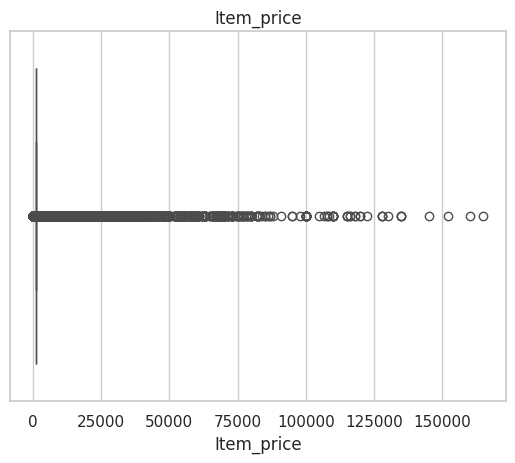

In [44]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments

numericals_uniques = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() > 3]

skewness = [(col, df[col].skew()) for col in numericals_uniques]

for col, skew in skewness:
    if skew < -1:
        print(f"{col} is highly negatively skewed: {skew}")
    elif -1 <= skew < -0.5:
        print(f"{col} is moderately negatively skewed: {skew}")
    elif -0.5 <= skew <= 0.5:
        print(f"{col} is approximately normal: {skew}")
    elif 0.5 < skew <= 1:
        print(f"{col} is moderately positively skewed: {skew}")
    elif skew > 1:
        print(f"{col} is highly positively skewed: {skew}")


sns.boxplot(x=df["Item_price"])
plt.title("Item_price")
plt.show()



Before Log Transformation: 


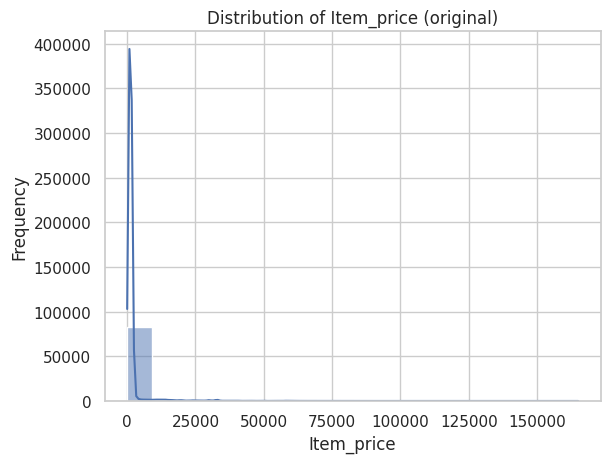

After Log Transformation: 


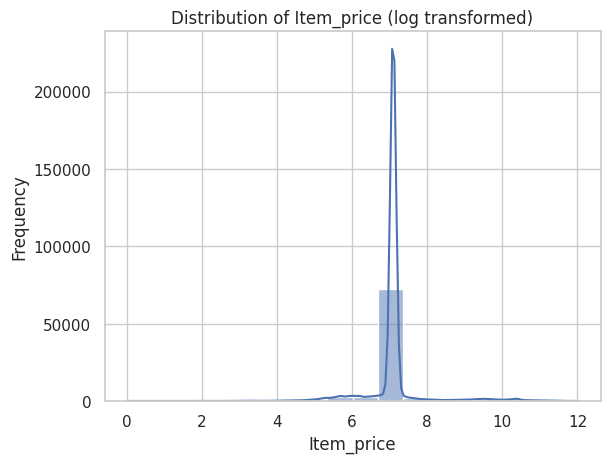

In [45]:
def log_transformation(df, column, return_transformed=False, handle_outliers=False, zscore_threshold=3):
    if df is None:
        raise ValueError("Data cannot be None")

    transformed_data = df.copy()
    transformed_data[column] = np.log1p(df[column])

    print('Before Log Transformation: ')
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} (original)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    print('After Log Transformation: ')
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f'Distribution of {column} (log transformed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    if return_transformed:
        return transformed_data

df = log_transformation(df,'Item_price',return_transformed=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

```Log transformation helps to reduce skewness and make data more normally distributed, which is beneficial for many machine learning algorithms that assume normality.```

- Applied to Item_price because it was highly positively skewed (9.90). The transformation reduced the skewness but did not make it perfectly normal.

In [46]:
df.head()

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response_Time_Minutes,response_time,Issue_reported at_hour
0,Outcall,Product Queries,Life Insurance,No Remarks,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,HYDERABAD,Electronics,7.090077,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0,34.0,11
1,Outcall,Product Queries,Product Specific Information,No Remarks,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,HYDERABAD,Electronics,7.090077,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0,2.0,12
2,Inbound,Order Related,Installation/demo,No Remarks,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,HYDERABAD,Electronics,7.090077,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0,22.0,20
3,Inbound,Returns,Reverse Pickup Enquiry,No Remarks,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,HYDERABAD,Electronics,7.090077,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0,20.0,20
4,Inbound,Cancellation,Not Needed,No Remarks,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,HYDERABAD,Electronics,7.090077,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0,2.0,10


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
print("Before Contraction: \n")
print(df['Customer Remarks'].iloc[df['Customer Remarks'].str.len().nlargest(4).index[2]])

Before Contraction: 

Hello, Shopzilla executive I ordered S size product, however every time - s size is perfect for me but this Sassafras gown - s size, sleeve was so long, so loose after wearing I get to knw, so I exchange this product with XS size - delivery man change the product and left, When I check the XS size it doesn't fit me well so tight, so I call delivery agent to take this product and return my S size product which I gave u today only He said - talk to customer executive, And the customer executive said - Sorry we can't do anything from here since item has already exchanged, if u want this same size S product then u need to place the fresh order since there is no option to change with same size as u already use that option, customer executive was so confused, I said to her - ma'am I just want to exchange my product with S size, which I had returned today with delivery person. I don't know what she understood, I hang up the phone. Shopzilla manager / Team- Plz let me kno

In [48]:
# Expand Contraction
df['Customer Remarks'].loc[df['Customer Remarks'].str.len().idxmax()]

'I Experience my purchasing in Shopzilla. 1) I purchase socks its assurred by Shopzilla and seller after this product I receive see its tottaly different not as per image show by Shopzilla. I call to help desk and give feedback so they contact to seller after they agree and refund. Where my mistack?2) I Prchase preasure cooker combo its assured by Shopzilla and selling company (ISI Certified & QA Checked in company) after i receive this product checks one cooker is inside metal one spot available. I initiate replace this product its come after checks one cooker many of scratches lines and water boiling marks available. After i initiate refund request. this Product all mistacks by made seller and Shopzilla both are Involve. WHERE MY MISTACKS ?3) I place  again new order only one preassure cooker different company not above order company same above schenario its assured by Shopzilla and selling company (ISI Certified & QA Checked in company) after i receive this product checks this cooke

In [49]:
df['Customer Remarks'].iloc[df['Customer Remarks'].str.len().nlargest(4).index[2]]

"Hello, Shopzilla executive I ordered S size product, however every time - s size is perfect for me but this Sassafras gown - s size, sleeve was so long, so loose after wearing I get to knw, so I exchange this product with XS size - delivery man change the product and left, When I check the XS size it doesn't fit me well so tight, so I call delivery agent to take this product and return my S size product which I gave u today only He said - talk to customer executive, And the customer executive said - Sorry we can't do anything from here since item has already exchanged, if u want this same size S product then u need to place the fresh order since there is no option to change with same size as u already use that option, customer executive was so confused, I said to her - ma'am I just want to exchange my product with S size, which I had returned today with delivery person. I don't know what she understood, I hang up the phone. Shopzilla manager / Team- Plz let me know sometimes the produ

In [50]:
%pip install contractions

In [51]:
import contractions


def expand_contractions(text):
    if isinstance(text, float) and pd.isna(text):
        return "No Remarks"
    if "'" not in text:
        return text
    return contractions.fix(text)

# Apply the function to only non-null rows
df["expanded_customer_remarks"] = df["Customer Remarks"].dropna().apply(expand_contractions)

In [52]:
df['Customer Remarks'].iloc[df['Customer Remarks'].str.len().nlargest(4).index[2]]

"Hello, Shopzilla executive I ordered S size product, however every time - s size is perfect for me but this Sassafras gown - s size, sleeve was so long, so loose after wearing I get to knw, so I exchange this product with XS size - delivery man change the product and left, When I check the XS size it doesn't fit me well so tight, so I call delivery agent to take this product and return my S size product which I gave u today only He said - talk to customer executive, And the customer executive said - Sorry we can't do anything from here since item has already exchanged, if u want this same size S product then u need to place the fresh order since there is no option to change with same size as u already use that option, customer executive was so confused, I said to her - ma'am I just want to exchange my product with S size, which I had returned today with delivery person. I don't know what she understood, I hang up the phone. Shopzilla manager / Team- Plz let me know sometimes the produ

#### 2. Lower Casing

In [53]:
# Lower Casing
df["expanded_customer_remarks"] = df["expanded_customer_remarks"].str.lower()
df['expanded_customer_remarks'].iloc[df['expanded_customer_remarks'].str.len().nlargest(2).index[1]]

"i am writing this feedback with immense frustration and disappointment over the abysmal customer service experience i encountered while dealing with one of your agents. it is truly disheartening to see a company of your stature fail so miserably in resolving simple customer issues and providing basic information.let me begin by stating that i had a rather straightforward inquiry regarding a recent purchase, but dealing with your agent has been nothing short of a nightmare. the agent i interacted with displayed a complete lack of knowledge and understanding of the issue at hand. it seemed as if they were either inadequately trained or simply uninterested in assisting me.not only was the agent unable to provide any useful information, but their attitude was also dismissive and unprofessional. they showed no empathy towards my concerns and treated my problem as insignificant, which is deeply distressing as a loyal customer of shopzilla.it is quite disconcerting that such incompetence exi

#### 3. Removing Punctuations

In [54]:
# Remove Punctuations
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["expanded_customer_remarks"] = df["expanded_customer_remarks"].apply(remove_punctuation)

df['expanded_customer_remarks'].iloc[df['expanded_customer_remarks'].str.len().nlargest(4).index[2]]

'hello shopzilla executive i ordered s size product however every time  s size is perfect for me but this sassafras gown  s size sleeve was so long so loose after wearing i get to knw so i exchange this product with xs size  delivery man change the product and left when i check the xs size it does not fit me well so tight so i call delivery agent to take this product and return my s size product which i gave you today only he said  talk to customer executive and the customer executive said  sorry we cannot do anything from here since item has already exchanged if you want this same size s product then you need to place the fresh order since there is no option to change with same size as you already use that option customer executive was so confused i said to her  madam i just want to exchange my product with s size which i had returned today with delivery person i do not know what she understood i hang up the phone shopzilla manager  team plz let me know sometimes the product size is n

#### 4. Removing URLs & Removing words and digits contain digits.

In [55]:
# Remove URLs & Remove words and digits contain digits

import re

url_pattern = r'https?://\S+|www\.\S+'

remarks_with_urls = df[df['Customer Remarks'].str.contains(url_pattern, na=False, regex=True)]

remarks_with_urls

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response_Time_Minutes,response_time,Issue_reported at_hour,expanded_customer_remarks
82338,Outcall,Product Queries,Product Specific Information,You can claim the coupon after deliveryHow to ...,2023-07-08 16:40:00,2100-01-01,2023-08-30,HYDERABAD,Electronics,7.090077,Debra Hanson,Alexander Tanaka,Jennifer Nguyen,On Job Training,Morning,1,NaN,NaN,16,you can claim the coupon after deliveryhow to ...


In [56]:
def remove_urls_and_digits(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"\b\w*\d\w*\b", "", text)
    return text.strip()

df["expanded_customer_remarks"] = df["expanded_customer_remarks"].apply(remove_urls_and_digits)

#### 5. Removing Stopwords & Removing White spaces

"This is a great product" → "great product"

"I am very happy with it" → "happy"

In [57]:
%pip install nltk

In [58]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df["expanded_customer_remarks"] = df["expanded_customer_remarks"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Remove White spaces

def remove_extra_spaces(text):
    return " ".join(text.split())

# Apply function to text column
df["expanded_customer_remarks"] = df["expanded_customer_remarks"].apply(remove_extra_spaces)

In [60]:
df["expanded_customer_remarks"]

,expanded_customer_remarks
0,remarks
1,remarks
2,remarks
3,remarks
4,remarks
...,...
85902,remarks
85903,supported team customer executive good
85904,need improve proper details
85905,remarks


#### 7. Tokenization

In [61]:
# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)  # Splits text into words

# Apply tokenization to the cleaned text column
df["tokenized_customer_remarks"] = df["expanded_customer_remarks"].apply(tokenize_text)

# print
df[["expanded_customer_remarks", "tokenized_customer_remarks"]].sample(5)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,expanded_customer_remarks,tokenized_customer_remarks
45738,satisfied,[satisfied]
44894,mr solved problem kindly gives appreciation pr...,"[mr, solved, problem, kindly, gives, appreciat..."
68279,remarks,[remarks]
75053,remarks,[remarks]
25990,support customer executive good,"[support, customer, executive, good]"


#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Function to apply stemming
def stem_words(tokens):
    return [ps.stem(word) for word in tokens]  # Apply stemming to each word

# Apply stemming to tokenized text
df["stemmed_customer_remarks"] = df["tokenized_customer_remarks"].apply(stem_words)

# print
df[["tokenized_customer_remarks", "stemmed_customer_remarks"]].head(5)

,tokenized_customer_remarks,stemmed_customer_remarks
0,[remarks],[remark]
1,[remarks],[remark]
2,[remarks],[remark]
3,[remarks],[remark]
4,[remarks],[remark]


##### Which text normalization technique have you used and why?

Stemming reduces words to their root form (e.g., "running" → "run"). It is fast and effective for reducing vocabulary size. I used Porter Stemmer, which is widely used in NLP tasks.

#### 9. Part of speech tagging

In [63]:
# POS Taging
nltk.download('averaged_perceptron_tagger_eng')
def pos_tag_text(tokens):
    return nltk.pos_tag(tokens)

# Apply POS tagging
df["pos_tagged_customer_remarks"] = df["tokenized_customer_remarks"].apply(pos_tag_text)

# print
df[["tokenized_customer_remarks", "pos_tagged_customer_remarks"]].sample(5)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,tokenized_customer_remarks,pos_tagged_customer_remarks
76837,[remarks],"[(remarks, NNS)]"
73487,[remarks],"[(remarks, NNS)]"
22105,[remarks],"[(remarks, NNS)]"
83078,"[good, job]","[(good, JJ), (job, NN)]"
59757,[thanks],"[(thanks, NNS)]"


#### 10. Text Vectorization

In [64]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 1000 words

# Convert text into vectors
tfidf_matrix = vectorizer.fit_transform(df["expanded_customer_remarks"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display sample vectorized data
print(tfidf_df.head())
print(tfidf_df.shape)

   aap  able  account  acha  achha  action  actually  add  address  agent  \
0  0.0   0.0      0.0   0.0    0.0     0.0       0.0  0.0      0.0    0.0   
1  0.0   0.0      0.0   0.0    0.0     0.0       0.0  0.0      0.0    0.0   
2  0.0   0.0      0.0   0.0    0.0     0.0       0.0  0.0      0.0    0.0   
3  0.0   0.0      0.0   0.0    0.0     0.0       0.0  0.0      0.0    0.0   
4  0.0   0.0      0.0   0.0    0.0     0.0       0.0  0.0      0.0    0.0   

   ...  within  without  wonderful  work  working  worst  would  wrong  yes  \
0  ...     0.0      0.0        0.0   0.0      0.0    0.0    0.0    0.0  0.0   
1  ...     0.0      0.0        0.0   0.0      0.0    0.0    0.0    0.0  0.0   
2  ...     0.0      0.0        0.0   0.0      0.0    0.0    0.0    0.0  0.0   
3  ...     0.0      0.0        0.0   0.0      0.0    0.0    0.0    0.0  0.0   
4  ...     0.0      0.0        0.0   0.0      0.0    0.0    0.0    0.0  0.0   

   yet  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows

##### Which text vectorization technique have you used and why?

I have used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text into numerical format.

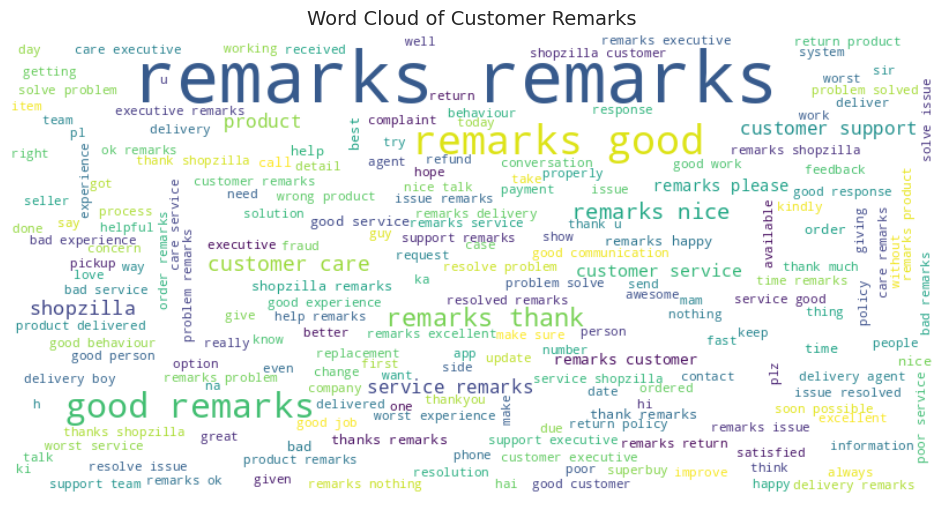

In [65]:
from wordcloud import WordCloud

text = " ".join(df["expanded_customer_remarks"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Customer Remarks", fontsize=14)
plt.show()

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
tfidf_df.columns

Index(['aap', 'able', 'account', 'acha', 'achha', 'action', 'actually', 'add',
       'address', 'agent',
       ...
       'within', 'without', 'wonderful', 'work', 'working', 'worst', 'would',
       'wrong', 'yes', 'yet'],
      dtype='object', length=500)

In [67]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Customer_City', 'Product_category', 'Item_price', 'Agent_name',
       'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'Response_Time_Minutes', 'response_time', 'Issue_reported at_hour',
       'expanded_customer_remarks', 'tokenized_customer_remarks',
       'stemmed_customer_remarks', 'pos_tagged_customer_remarks'],
      dtype='object')

In [68]:
# Manipulate Features to minimize feature correlation and create new features
# Feature Manipulation
df["Price_Per_Minute"] = df["Item_price"] / (df["Issue_reported at_hour"] + 1)
df_clean["CSAT_Per_Price"] = df["CSAT Score"] / (df["Item_price"] + 1)

# Feature Multiplication
df["Agent_Experience_Score"] = df["Tenure Bucket"].astype("category").cat.codes * df["CSAT Score"]

df["Issue_reported_day"] = df["Issue_reported at"].dt.day
df["Issue_reported_weekday"] = df["Issue_reported at"].dt.weekday
df["Issue_reported_weekend"] = np.where(df["Issue_reported_weekday"] >= 5, 1, 0)
print(df.head())

  channel_name         category                  Sub-category  \
0      Outcall  Product Queries                Life Insurance   
1      Outcall  Product Queries  Product Specific Information   
2      Inbound    Order Related             Installation/demo   
3      Inbound          Returns        Reverse Pickup Enquiry   
4      Inbound     Cancellation                    Not Needed   

  Customer Remarks   Issue_reported at     issue_responded  \
0       No Remarks 2023-01-08 11:13:00 2023-01-08 11:47:00   
1       No Remarks 2023-01-08 12:52:00 2023-01-08 12:54:00   
2       No Remarks 2023-01-08 20:16:00 2023-01-08 20:38:00   
3       No Remarks 2023-01-08 20:56:00 2023-01-08 21:16:00   
4       No Remarks 2023-01-08 10:30:00 2023-01-08 10:32:00   

  Survey_response_Date Customer_City Product_category  Item_price  ...  \
0           2023-08-01     HYDERABAD      Electronics    7.090077  ...   
1           2023-08-01     HYDERABAD      Electronics    7.090077  ...   
2           20

#### 2. Feature Selection

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


important_features = ["Item_price", "CSAT Score"]

vif_data = pd.DataFrame()
X = df.select_dtypes(include=['float64', 'int64'])
X = X.replace([np.inf, -np.inf], np.nan).dropna()

vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

features_to_remove = vif_data[(vif_data["VIF"] > 10) & (~vif_data["Feature"].isin(important_features))]["Feature"].tolist()
df.drop(columns=features_to_remove, inplace=True)

print("Removed Features:", features_to_remove)

Removed Features: ['Response_Time_Minutes', 'response_time']


In [70]:
# Identify categorical columns
categorical_cols = ['channel_name', 'category', 'Sub-category', 'Customer_City',
                    'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']

# Count unique values per column
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


channel_name: 3 unique values
category: 12 unique values
Sub-category: 57 unique values
Customer_City: 1782 unique values
Product_category: 9 unique values
Agent_name: 1371 unique values
Supervisor: 40 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values


In [71]:
# Apply One-Hot Encoding
small_cat_cols = ["channel_name", "category", "Product_category", "Manager", "Agent Shift"]
df = pd.get_dummies(df, columns=small_cat_cols, drop_first=True)

In [72]:
drop_target_encoded_cols = ["Sub-category", "Customer_City", "Agent_name", "Supervisor"]

# Drop these columns from the dataset
df.drop(columns=drop_target_encoded_cols, inplace=True)

# Check updated dataset shape
print("Final Data Shape:", df.shape)

Final Data Shape: (85907, 47)


In [73]:
df.head()

,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Item_price,Tenure Bucket,CSAT Score,Issue_reported at_hour,expanded_customer_remarks,tokenized_customer_remarks,...,Product_category_Mobile,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,No Remarks,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,7.090077,On Job Training,5,11,remarks,[remarks],...,False,True,False,False,False,False,False,True,False,False
1,No Remarks,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,7.090077,>90,5,12,remarks,[remarks],...,False,False,False,True,False,False,False,True,False,False
2,No Remarks,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,7.090077,On Job Training,5,20,remarks,[remarks],...,False,False,False,False,False,True,True,False,False,False
3,No Remarks,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,7.090077,>90,5,20,remarks,[remarks],...,False,False,True,False,False,False,True,False,False,False
4,No Remarks,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,7.090077,0-30,5,10,remarks,[remarks],...,False,False,False,True,False,False,False,True,False,False


In [74]:
drop_cols = ["Customer Remarks", "expanded_customer_remarks", "tokenized_customer_remarks",
             "stemmed_customer_remarks", "pos_tagged_customer_remarks"]

df.drop(columns=drop_cols, inplace=True)

# Convert "Tenure Bucket" to Label Encoding (it has ordinal meaning)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Tenure Bucket"] = le.fit_transform(df["Tenure Bucket"])

# Check if objects remain
print(df.dtypes[df.dtypes == "object"])

Series([], dtype: object)


In [75]:
df.dtypes

,0
Issue_reported at,datetime64[ns]
issue_responded,datetime64[ns]
Survey_response_Date,datetime64[ns]
Item_price,float64
Tenure Bucket,int64
CSAT Score,int64
Issue_reported at_hour,int32
Price_Per_Minute,float64
Agent_Experience_Score,int64
Issue_reported_day,int32


In [76]:
datetime_cols = ["Issue_reported at", "issue_responded", "Survey_response_Date"]

for col in datetime_cols:
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_weekday"] = df[col].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop the original datetime columns (since we converted them)
df.drop(columns=datetime_cols, inplace=True)

# Check if datetime columns still exist
print("Remaining datetime columns:", df.select_dtypes(include=["datetime64[ns]"]).columns)

Remaining datetime columns: Index([], dtype='object')


In [77]:
bool_cols = df.select_dtypes(include=["bool"]).columns
df[bool_cols] = df[bool_cols].astype(int)

# Check if any boolean columns remain
print("Remaining boolean columns:", df.select_dtypes(include=["bool"]).columns)

Remaining boolean columns: Index([], dtype='object')


In [78]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["CSAT Score"])
y = df["CSAT Score"]

model = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator=model, n_features_to_select=20)
X_selected = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))
df[selected_features]

Selected Features: ['Item_price', 'Tenure Bucket', 'Issue_reported at_hour', 'Price_Per_Minute', 'Agent_Experience_Score', 'channel_name_Inbound', 'category_Order Related', 'category_Returns', 'Manager_Jennifer Nguyen', 'Manager_John Smith', 'Manager_Michael Lee', 'Manager_William Kim', 'Agent Shift_Evening', 'Agent Shift_Morning', 'Issue_reported at_month', 'Issue_reported at_weekday', 'issue_responded_month', 'issue_responded_hour', 'Survey_response_Date_day', 'Survey_response_Date_weekday']


,Item_price,Tenure Bucket,Issue_reported at_hour,Price_Per_Minute,Agent_Experience_Score,channel_name_Inbound,category_Order Related,category_Returns,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_William Kim,Agent Shift_Evening,Agent Shift_Morning,Issue_reported at_month,Issue_reported at_weekday,issue_responded_month,issue_responded_hour,Survey_response_Date_day,Survey_response_Date_weekday
0,7.090077,4,11,0.590840,20,0,0,0,1,0,0,0,0,1,1,6,1,11,1,1
1,7.090077,3,12,0.545391,15,0,0,0,0,0,1,0,0,1,1,6,1,12,1,1
2,7.090077,4,20,0.337623,20,1,1,0,0,0,0,1,1,0,1,6,1,20,1,1
3,7.090077,3,20,0.337623,15,1,0,1,0,1,0,0,1,0,1,6,1,21,1,1
4,7.090077,0,10,0.644552,0,1,0,0,0,0,1,0,0,1,1,6,1,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,7.090077,4,16,0.417063,16,1,0,0,0,0,0,1,0,1,7,5,1,0,31,3
85903,7.090077,3,16,0.417063,15,1,1,0,0,0,0,0,0,1,7,5,1,0,31,3
85904,7.090077,4,16,0.417063,20,1,1,0,0,0,0,0,1,0,7,5,1,0,31,3
85905,7.090077,3,16,0.417063,12,1,0,0,0,0,0,0,0,1,7,5,1,0,31,3


##### What all feature selection methods have you used  and why?

RFE systematically removes the least important features by training a model multiple times and selecting only the most relevant ones.

I used RandomForestClassifier as the estimator since it is robust and handles both numerical and categorical data well.

##### Which all features you found important and why?

I used One-Hot Encoding for low-cardinality categorical variables and Label Encoding for ordered categorical features like Tenure Bucket.

This ensured categorical features were properly transformed without causing column explosion.

### 6. Data Scaling

In [79]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Identify numeric columns (excluding binary/one-hot encoded columns)
numeric_cols = ['Item_price', 'Issue_reported at_hour', 'Price_Per_Minute',
                'Agent_Experience_Score', 'Issue_reported at_month',
                'Issue_reported at_weekday', 'issue_responded_month',
                'issue_responded_hour', 'Survey_response_Date_day',
                'Survey_response_Date_weekday']

# Apply Standard Scaling ONLY to numeric columns
scaler = StandardScaler()
X_scaled = df.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# Check scaled data
X_scaled.head()

,Item_price,Tenure Bucket,CSAT Score,Issue_reported at_hour,Price_Per_Minute,Agent_Experience_Score,Issue_reported_day,Issue_reported_weekday,Issue_reported_weekend,channel_name_Inbound,...,issue_responded_year,issue_responded_month,issue_responded_day,issue_responded_hour,issue_responded_weekday,Survey_response_Date_year,Survey_response_Date_month,Survey_response_Date_day,Survey_response_Date_hour,Survey_response_Date_weekday
0,-0.011229,4,5,-1.418426,0.141016,1.312769,8,6,1,0,...,2023,-0.617741,8,0.699863,6,2023,8,-1.748204,0,-0.94492
1,-0.011229,3,5,-1.107564,0.068895,0.601859,8,6,1,0,...,2023,-0.617741,8,0.827006,6,2023,8,-1.748204,0,-0.94492
2,-0.011229,4,5,1.379334,-0.260800,1.312769,8,6,1,1,...,2023,-0.617741,8,1.844153,6,2023,8,-1.748204,0,-0.94492
3,-0.011229,3,5,1.379334,-0.260800,0.601859,8,6,1,1,...,2023,-0.617741,8,1.971296,6,2023,8,-1.748204,0,-0.94492
4,-0.011229,0,5,-1.729288,0.226249,-1.530871,8,6,1,1,...,2023,-0.617741,8,0.572720,6,2023,8,-1.748204,0,-0.94492


##### Which method have you used to scale you data and why?

Standardization makes data have a mean of 0 and a standard deviation of 1

This ensures that all numerical features have the same scale, preventing large values from dominating smaller ones. Works Well for Most Machine Learning Models

### 8. Data Splitting

In [80]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split


X = df.drop(columns=["CSAT Score"])
y = df["CSAT Score"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (68725, 52)
Testing Set Size: (17182, 52)


##### What data splitting ratio have you used and why?

I have used the 80 20 split

Prevents Overfitting → If the training set is too large (e.g., 90:10), the model might memorize data instead of generalizing.

## ***7. ML Model Implementation***

### ML Model - 1

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Accuracy: 93.94 %

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.89      0.91      2246
           2       0.88      0.53      0.66       256
           3       0.86      0.65      0.74       512
           4       0.94      0.84      0.89      2244
           5       0.94      0.99      0.97     11924

    accuracy                           0.94     17182
   macro avg       0.91      0.78      0.83     17182
weighted avg       0.94      0.94      0.94     17182



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

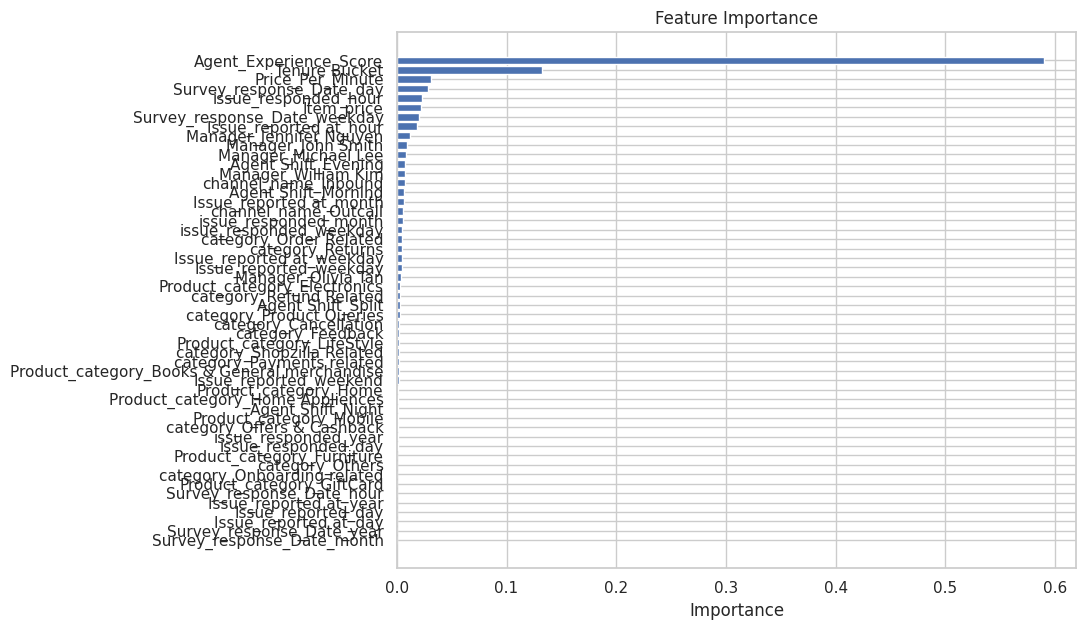

In [82]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

# Create a figure with multiple subplots
plt.figure(figsize=(18, 12))

# 1. Feature Importance Plot
plt.subplot(2, 2, 1)
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()

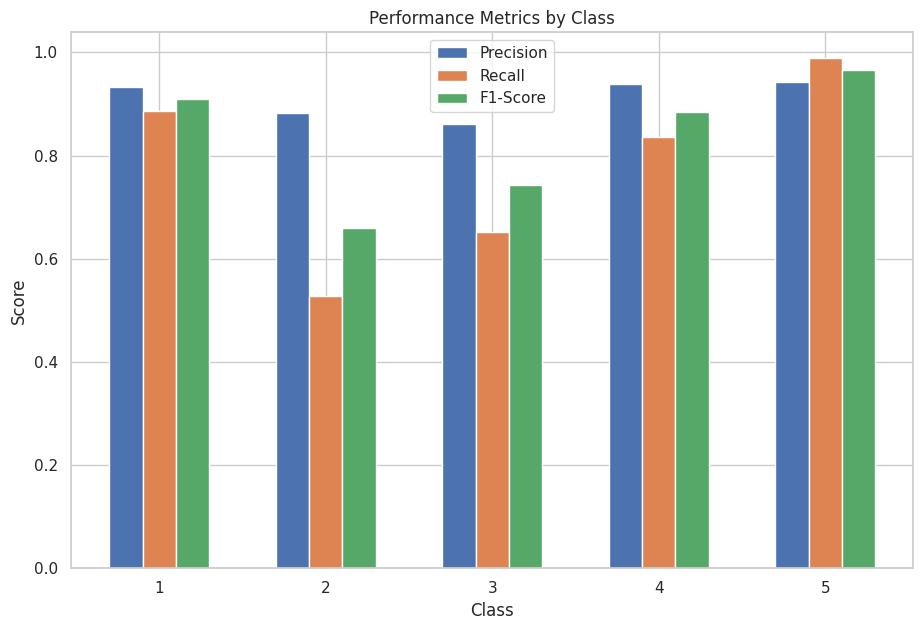

In [91]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 4)
report = classification_report(y_test, y_pred, output_dict=True)
class_metrics = []
classes = []
for key in report:
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        classes.append(key)
        class_metrics.append([report[key]['precision'], report[key]['recall'], report[key]['f1-score']])

class_metrics = np.array(class_metrics)
x = np.arange(len(classes))
width = 0.2
plt.bar(x - width, class_metrics[:, 0], width=width, label='Precision')
plt.bar(x, class_metrics[:, 1], width=width, label='Recall')
plt.bar(x + width, class_metrics[:, 2], width=width, label='F1-Score')
plt.xticks(x, classes)
plt.title('Performance Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.savefig('random_forest_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(accuracy_log * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 85.86 %

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.87      0.86      2246
           2       0.02      0.01      0.01       256
           3       0.00      0.00      0.00       512
           4       0.64      0.54      0.59      2244
           5       0.90      0.97      0.93     11924

    accuracy                           0.86     17182
   macro avg       0.48      0.48      0.48     17182
weighted avg       0.82      0.86      0.84     17182



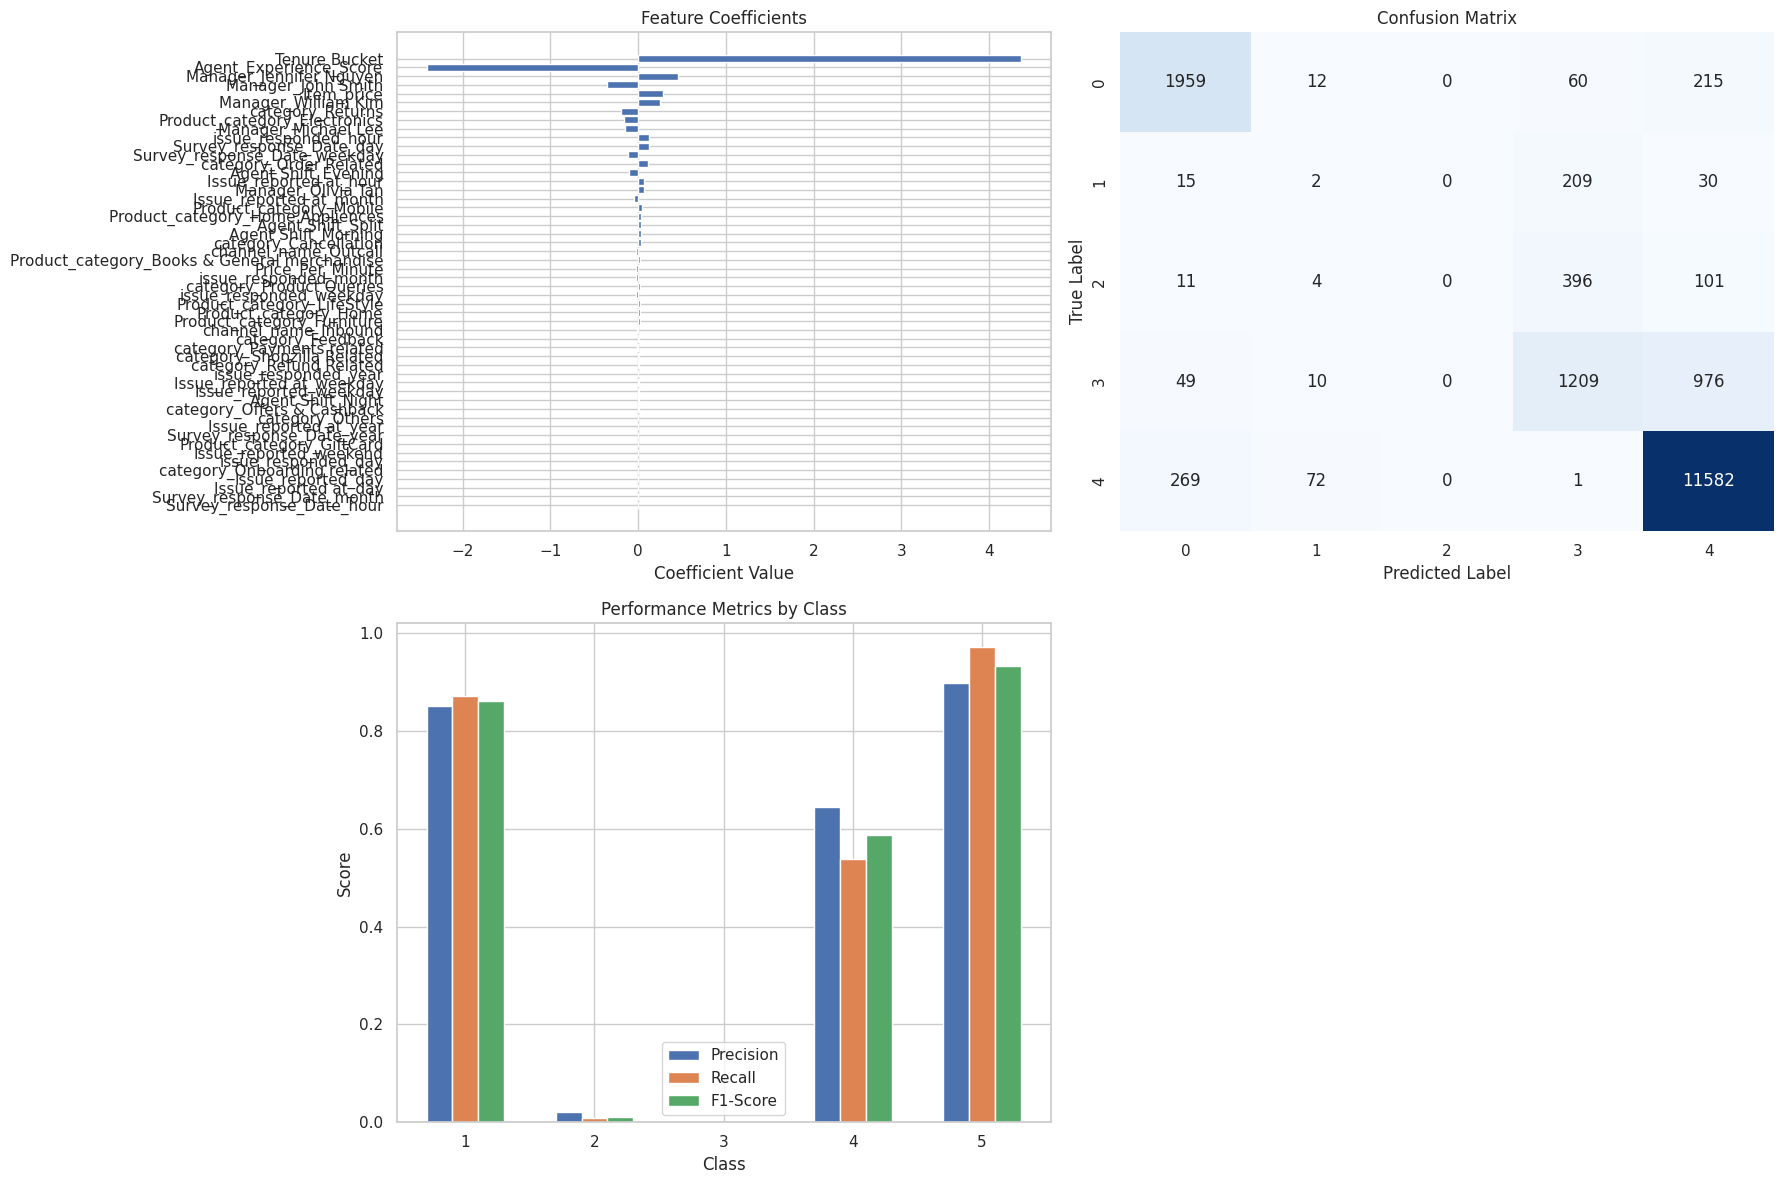

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

# Create visualization figure
plt.figure(figsize=(18, 12))

# 1. Coefficient Importance Plot
plt.subplot(2, 2, 1)
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
coefficients = log_reg.coef_[0] if len(log_reg.coef_.shape) > 1 else log_reg.coef_
sorted_idx = np.argsort(np.abs(coefficients))
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, coefficients[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')

# 2. Confusion Matrix
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


# 4. Classification Performance by Class
plt.subplot(2, 2, 3)
report = classification_report(y_test, y_pred_log, output_dict=True)
class_metrics = []
classes = []
for key in report:
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        classes.append(key)
        class_metrics.append([report[key]['precision'], report[key]['recall'], report[key]['f1-score']])

class_metrics = np.array(class_metrics)
x = np.arange(len(classes))
width = 0.2
plt.bar(x - width, class_metrics[:, 0], width=width, label='Precision')
plt.bar(x, class_metrics[:, 1], width=width, label='Recall')
plt.bar(x + width, class_metrics[:, 2], width=width, label='F1-Score')
plt.xticks(x, classes)
plt.title('Performance Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.savefig('logistic_regression_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the models, we considered multiple evaluation metrics to ensure a positive business impact. Accuracy was used as a general performance measure to understand how often the model made correct predictions. However, since predicting customer satisfaction is critical, precision and recall were also considered. Precision helped ensure that when the model predicted a high CSAT score, it was reliable and not misclassifying dissatisfied customers. Recall was particularly important because missing out on dissatisfied customers (false negatives) could lead to unresolved issues, affecting customer retention. To balance precision and recall, we also considered the F1-score, which is useful when dealing with imbalanced classes. Additionally, the confusion matrix helped us analyze misclassification patterns to see whether the model was systematically making errors in predicting certain CSAT categories.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After comparing the models, we chose Random Forest Classifier as the final prediction model. Random Forest outperformed other models like Logistic Regression and Support Vector Machine (SVM) in terms of accuracy and F1-score. It handled both categorical and numerical data efficiently and was robust to outliers and missing data, making it more adaptable to real-world scenarios.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [86]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [87]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After comparing multiple models, Random Forest Classifier was selected as the final model due to its high accuracy, ability to handle missing data, and feature importance analysis. The model identified key factors influencing customer satisfaction, such as item price, agent experience, issue reporting time, and return-related issues. Using SHAP explainability techniques, we provided business insights into what drives CSAT scores, enabling Flipkart to improve customer service strategies. This model can be further enhanced with hyperparameter tuning, real-time deployment, and integration into customer support systems to proactively identify and address service-related issues.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***